# Conjectures

In [1]:
import sys
sys.path.insert(0, '../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_maps import *
from quantum_tools import *
from experiments import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

## Conjecture

In [21]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
n = 3
d = 2**n

model_list = []

for i in tqdm(range(5)):
    kraus = KrausMap(d = d, 
                     rank = d**2)

    model = ModelQuantumMap(
                            q_map = kraus,
                            loss = Conj2(index=1),
                            optimizer = tf.optimizers.Adam(learning_rate=0.005),
                           )

    model.train(inputs = [],
                targets = [],
                num_iter = 50000,
                N = 1,
                use_batch=False,
                verbose=False,
               )
    
    model_list.append(model)

pickle.dump(model_list, open("../../data/conjecture2.p", "wb"))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

0.00032522542937840626 0


  0%|          | 0/50000 [00:00<?, ?it/s]

0.00040369656678507226 0


  0%|          | 0/50000 [00:00<?, ?it/s]

0.0004142484715501382 0


  0%|          | 0/50000 [00:00<?, ?it/s]

0.000520516344039379 0


  0%|          | 0/50000 [00:00<?, ?it/s]

0.0005129092053053341 0


AttributeError: Can't pickle local object 'make_gradient_clipnorm_fn.<locals>.<lambda>'

In [23]:
loss_list = []

for model in model_list:
    loss_list.append(model.loss_train)
pickle.dump(loss_list, open("../../data/conjecture2.p", "wb"))

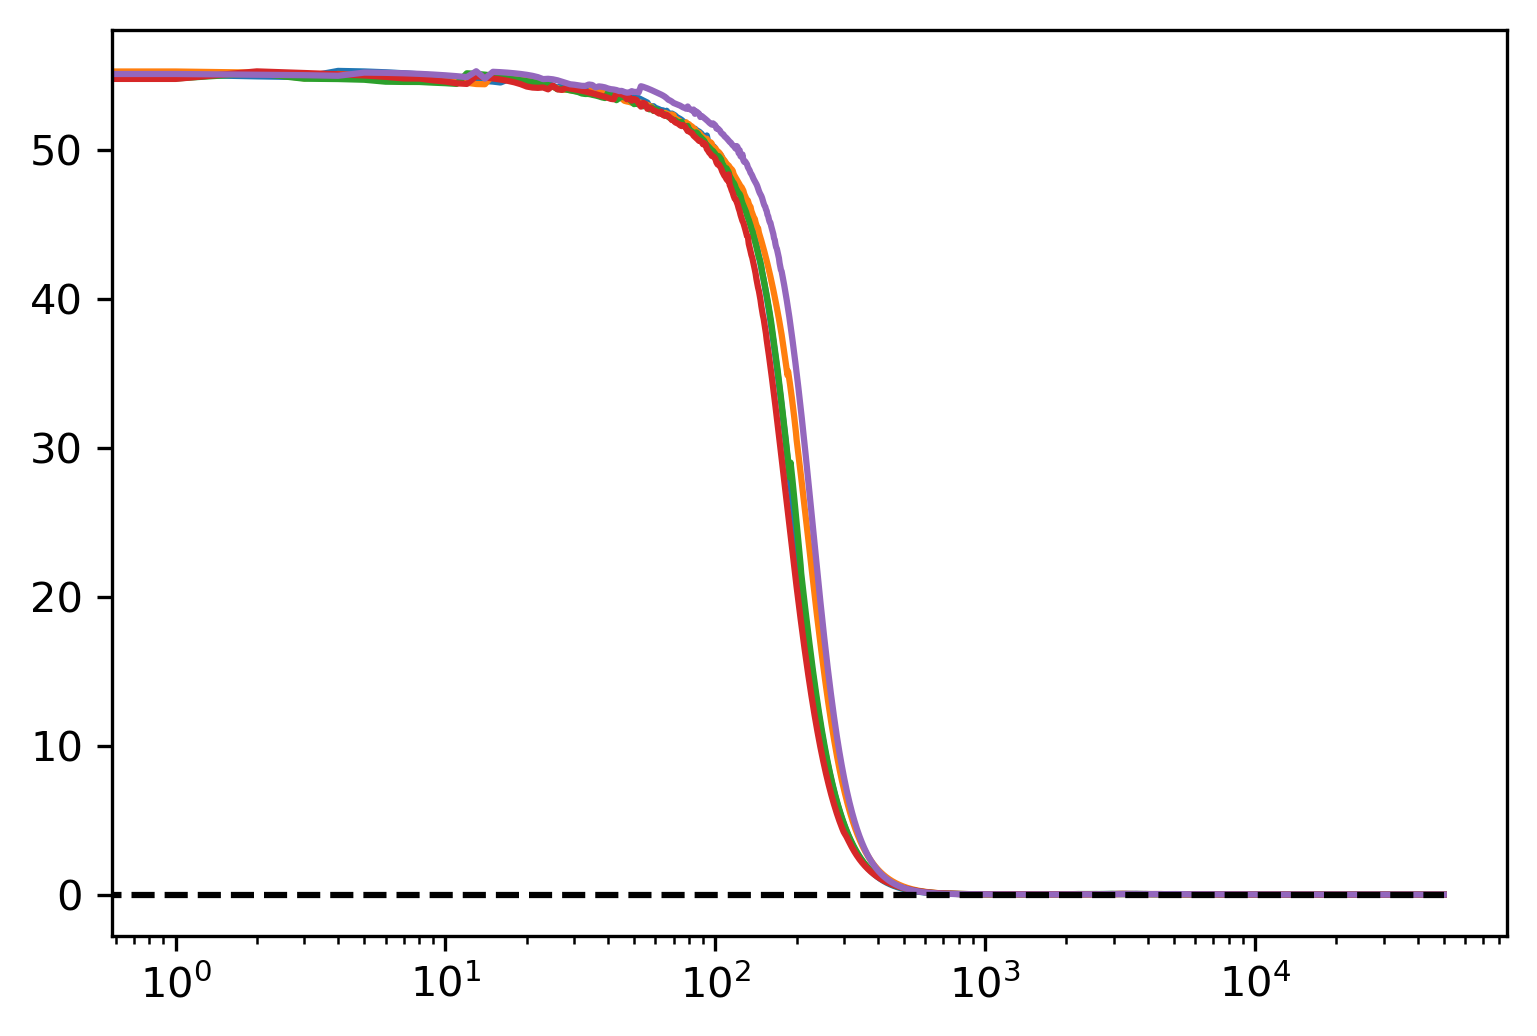

In [26]:
fig=plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')

for loss in loss_list:
    plt.plot(loss)
plt.plot([0, 50000], [0,0], "k--")
plt.xscale("log")
#plt.ylim([-1, 1])
plt.show()

In [25]:
loss_list

[[(55.22344765633622+0j),
  (55.06077461849769+0j),
  (54.948959716423936+0j),
  (54.89788112915817+0j),
  (55.313894243498+0j),
  (55.277367455169916+0j),
  (55.22214012367671+0j),
  (55.15606502909721+0j),
  (55.084950828128896+0j),
  (55.01256855869416+0j),
  (54.934453146738946+0j),
  (54.820850818719165+0j),
  (54.79026582718934+0j),
  (54.66205957838453+0j),
  (54.64128758940362+0j),
  (54.596054321081866+0j),
  (54.53594697165263+0j),
  (54.7312653092042+0j),
  (54.69565547184541+0j),
  (54.65055707347391+0j),
  (54.564671994121575+0j),
  (54.52920715714581+0j),
  (54.472415642722616+0j),
  (54.504046805248436+0j),
  (54.466772341492785+0j),
  (54.31433326762367+0j),
  (54.191189956642035+0j),
  (54.330174422959324+0j),
  (54.27370011069005+0j),
  (54.20704395342186+0j),
  (54.10783854138744+0j),
  (54.09554986163139+0j),
  (54.01114780628901+0j),
  (53.96167278649399+0j),
  (53.95758161874387+0j),
  (53.88816161753751+0j),
  (53.8882274279324+0j),
  (53.848744776074454+0j),
  (